In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
training = pd.read_csv("Q1_training.csv")
testing = pd.read_csv("Q1_testing.csv")

In [3]:
training.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [4]:
class_dict = {c:i for c,i in zip(training["class"].unique(), [0,1,2,3])}
training.insert(0,"classes",training["class"].apply(lambda x: class_dict[x]))
testing.insert(0,"classes",testing["class"].apply(lambda x: class_dict[x]))

In [5]:
training.head()

,classes,class,b1,b2,b3,b4,b5,b6,b7,b8,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,0,d,67,51,68,115,69,111,136,31,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,1,s,67,28,51,99,50,97,82,26,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,1,s,63,26,50,95,49,91,81,26,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,0,d,63,42,63,97,66,108,111,28,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,1,s,46,27,50,83,51,90,76,26,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [6]:
clf = LogisticRegression(penalty="none", random_state=0, max_iter=45000).fit(training.iloc[:,2:], training["classes"])
predicted = clf.predict_proba(testing.iloc[:,2:]).argmax(axis = 1)
# coefficients
clf.coef_

/home/jfftilton/anaconda3/envs/omsa/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ -0.28051696,  -0.85277484,   0.06337875,  -0.14934503,
         -1.23175168,   2.39206239,   0.14915056,   3.93307977,
         -2.82871046,   0.04329405,  -1.10810436,  -0.10430914,
         -0.2301919 ,  -1.48260569,   2.55370003,   0.10102918,
          3.71069195,  -2.7740489 ,   0.10206612,  -0.06089419,
         -0.90867469,   0.05401552,   1.82785082,   2.12926148,
         -0.43193217,   0.2939114 ,   0.13838855],
       [  1.08576311,   1.67000106,  -0.75492195,   0.01767604,
        -10.61890112,   5.90023925,  -0.90873822,   4.66018068,
         -4.694565  ,   0.90915217,   1.5440645 ,  -0.59242371,
          0.23191684, -10.49438818,   6.0348609 ,  -0.85228175,
          4.31523286,  -4.64157956,   0.21467943,   1.69805909,
         -0.59302252,   0.17584597,  -2.02959418,   1.39032212,
          0.06180502,  -0.28026781,   0.48743599],
       [ -0.44069626,   0.16336853,   0.28947182,   0.4980106 ,
          3.82047608,  -4.56836969,   0.02813109,  -9.43003668,
  

Text(0.5, 1.0, 'Logistic Regression')

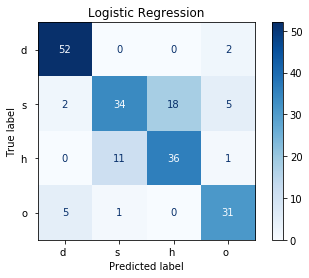

In [7]:
disp = plot_confusion_matrix(clf, testing.iloc[:,2:], testing["classes"],
                                 display_labels=class_dict.keys(),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Logistic Regression")

In [8]:
# ridge l2 regularization
clf = LogisticRegressionCV(solver="saga", penalty="l2", random_state=0, max_iter=45000, n_jobs=-1).fit(training.iloc[:,2:], training["classes"])
predicted = clf.predict_proba(testing.iloc[:,2:]).argmax(axis = 1)
# coefficients
clf.coef_

array([[-0.12678211,  0.06730095, -0.00222237,  0.01892476,  0.0541378 ,
         0.02060145,  0.0366058 ,  0.0691596 , -0.03472624,  0.07174226,
        -0.09867139, -0.08703979, -0.02109612, -0.01948618,  0.06955286,
        -0.01772771, -0.03569067,  0.0800899 , -0.0616762 , -0.12761693,
        -0.07780093,  0.07788041,  0.03041301,  0.02456876,  0.00948133,
         0.00195885,  0.00468326],
       [ 0.12213829,  0.03371129,  0.07511084, -0.08064668, -0.02017092,
         0.03341802, -0.07773279,  0.00987861, -0.04959571,  0.01726161,
         0.08849285,  0.20817988,  0.00767254,  0.04798529,  0.07628861,
        -0.05901965, -0.09740048, -0.0399133 ,  0.1046774 ,  0.05270369,
         0.09764397, -0.0853198 ,  0.01415838,  0.02126238,  0.07013027,
         0.04960851,  0.03653592],
       [ 0.12600633, -0.1818378 , -0.04705224,  0.06714677, -0.06440956,
        -0.03526161,  0.06500854, -0.13397314, -0.01669463, -0.08513967,
         0.1357273 , -0.07582701,  0.00423336,  0.0237

In [9]:
# optimal tuning parameter
clf.C_

array([0.04641589, 0.04641589, 0.04641589, 0.04641589])

Text(0.5, 1.0, 'Logistic Regression')

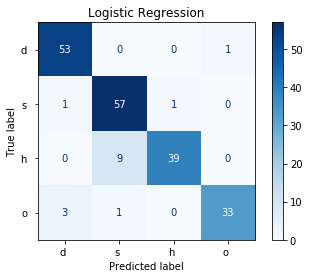

In [10]:
disp = plot_confusion_matrix(clf, testing.iloc[:,2:], testing["classes"],
                                 display_labels=class_dict.keys(),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Logistic Regression")

In [11]:
# lasso l1 regularization
clf = LogisticRegressionCV(solver="saga", penalty="l1", random_state=0, max_iter=45000, n_jobs=-1).fit(training.iloc[:,2:], training["classes"])
predicted = clf.predict_proba(testing.iloc[:,2:]).argmax(axis = 1)
# coefficients
clf.coef_

array([[-0.12258709,  0.00652285,  0.        ,  0.01059801,  0.03737933,
         0.        ,  0.04696138,  0.00614207,  0.        ,  0.07183821,
        -0.06085327, -0.03504022, -0.0036058 ,  0.        ,  0.02472298,
         0.        ,  0.        ,  0.06608325, -0.03825686, -0.16957079,
        -0.04280853,  0.06477816,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.11967854,  0.        ,  0.03791061, -0.10942702, -0.0005549 ,
         0.        , -0.05649495,  0.        ,  0.        ,  0.        ,
         0.10262947,  0.27507477,  0.        ,  0.06922658,  0.03640957,
        -0.02649287, -0.02984893, -0.00557919,  0.09546447,  0.        ,
         0.14693297, -0.10013928,  0.        ,  0.        ,  0.06709904,
         0.        ,  0.        ],
       [ 0.17807962, -0.41860817,  0.        ,  0.03396625, -0.01976475,
         0.        ,  0.00543095, -0.13324369,  0.        , -0.04802824,
         0.059626  ,  0.        ,  0.        ,  0.    

In [12]:
# optimal tuning parameter
clf.C_

array([0.35938137, 0.35938137, 0.35938137, 0.35938137])

Text(0.5, 1.0, 'Logistic Regression')

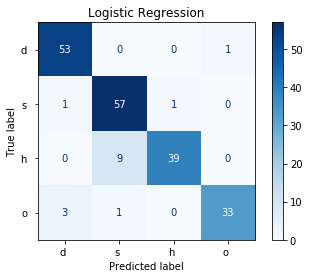

In [13]:
disp = plot_confusion_matrix(clf, testing.iloc[:,2:], testing["classes"],
                                 display_labels=class_dict.keys(),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Logistic Regression")

In [14]:
training.to_csv("Q1_training_.csv")
testing.to_csv("Q1_testing_.csv")

### Adaprive lasso was performed in R, results are shown below

#### Optimal lambda
0.01646145

#### Coefficients (easier to see in Q01.Rmd)
                               1             1             1             1
(Intercept)          9.466491205  3.8758409411 -6.5709409991 -6.7713911471
b1                  -0.112966564  0.0112082666  0.1927876101 -0.0910293122
b2                   .            .             .             .           
b3                   .            .             .             .           
b4                   .            .             .             .           
b5                   0.012676416 -0.0236290175 -0.0293994553  0.0403520566
b6                   .            .             .             .           
b7                   0.061926086 -0.0308314421 -0.0004944274 -0.0306002164
b8                   .            .             .             .           
b9                  -0.101777163  0.0125850571 -0.1141821827  0.2033742883
pred_minus_obs_H_b1  0.059994277 -0.0314464448 -0.0530574418  0.0245096099
pred_minus_obs_H_b2 -0.196098340  0.1416156613  0.2322222084 -0.1777395300
pred_minus_obs_H_b3 -0.023629593  0.0322763614 -0.0006256619 -0.0080211067
pred_minus_obs_H_b4  .            .             .             .           
pred_minus_obs_H_b5  .            .             .             .           
pred_minus_obs_H_b6  .            .             .             .           
pred_minus_obs_H_b7  .            .             .             .           
pred_minus_obs_H_b8  0.003108286 -0.0505357811  0.1103766315 -0.0629491367
pred_minus_obs_H_b9  .            .             .             .           
pred_minus_obs_S_b1  .            .             .             .           
pred_minus_obs_S_b2 -0.543741514 -0.0812875941  0.1960221601  0.4290069482
pred_minus_obs_S_b3  0.003385575  0.1623945190 -0.1667280412  0.0009479475
pred_minus_obs_S_b4  0.034388368 -0.0009357158 -0.0021483814 -0.0313042708
pred_minus_obs_S_b5  1.234917872 -0.2451289993 -1.0778236487  0.0880347762
pred_minus_obs_S_b6  0.058683621 -0.0396927462  0.0754839809 -0.0944748559
pred_minus_obs_S_b7 -0.014361156  0.0278524142 -0.0159543174  0.0024630594
pred_minus_obs_S_b8  .            .             .             .           
pred_minus_obs_S_b9  0.034656650  0.1103835586  0.2227311410 -0.3677713498


#### Confusion Matrix



                   True
                    d  s  h  o
    Predicted    d 53  0  0  3
                 s  0 58 14  1
                 h  0  1 34  0
                 o  1  0  0 33